In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()

In [11]:
iris.data[:, :]
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
h, xx, yy = np.histogram2d(iris.data[:, 0], iris.data[:, 1])
print(h)
print(xx)
print(yy)

[[ 0.  1.  0.  1.  3.  3.  1.  0.  0.  0.]
 [ 1.  2.  1.  0.  8.  8.  3.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.  3.  3.  5.  1.  0.]
 [ 0.  3.  6.  5.  4.  2.  1.  4.  0.  2.]
 [ 2.  0.  6.  2.  3.  2.  0.  0.  1.  0.]
 [ 1.  1.  5. 10.  3.  6.  0.  0.  0.  0.]
 [ 0.  0.  1.  3. 10.  4.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  4.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  2.  1.  1.  1.  0.  0.  0.]
 [ 0.  0.  1.  1.  2.  0.  0.  2.  0.  0.]]
[4.3  4.66 5.02 5.38 5.74 6.1  6.46 6.82 7.18 7.54 7.9 ]
[2.   2.24 2.48 2.72 2.96 3.2  3.44 3.68 3.92 4.16 4.4 ]


In [ ]:
print(h)
print(xx)
print(yy)

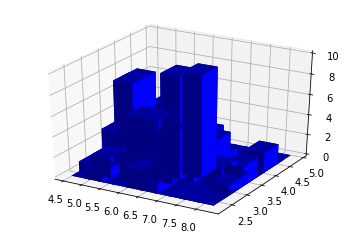

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(iris.data[:, 0], iris.data[:, 1])

# Construct arrays for the anchor positions of the 16 bars.
# Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos,
# ypos in column-major order. For numpy >= 1.7, we could instead call meshgrid
# with indexing='ij'.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

In [20]:
# Menghitung rerata 
m1 = np.mean(iris.data[0:50, 0:2], axis = 0)
m2 = np.mean(iris.data[50:100, 0:2], axis = 0)
m3 = np.mean(iris.data[100:150, 0:2], axis = 0)
print(m1)
print(m2)
print(m3)

[5.006 3.418]
[5.936 2.77 ]
[6.588 2.974]


In [17]:
# Menghitung Covariance untuk masing2 kelas Iris Dataset
c1 = np.cov(iris.data[0:50, 0:2].T)
c2 = np.cov(iris.data[50:100, 0:2].T)
c3 = np.cov(iris.data[100:150, 0:2].T)
print(c1)
print(c2)
print(c3)

[[0.12424898 0.10029796]
 [0.10029796 0.14517959]]
[[0.26643265 0.08518367]
 [0.08518367 0.09846939]]
[[0.40434286 0.09376327]
 [0.09376327 0.10400408]]


<function matplotlib.pyplot.show>

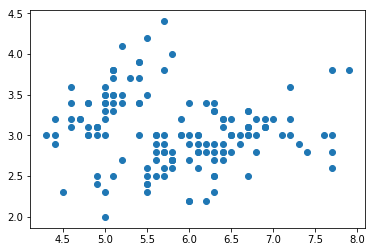

In [18]:
# Melihat scatter plot untuk data Iris
plt.scatter(iris.data[:, 0], iris.data[:, 1])
plt.show

In [28]:
from scipy.stats import multivariate_normal

# Katakan ada sebuah bunga Iris dengan petal.length = 3.0 dan petal.width = 2.6
# Bunga iris ini jenisnya apa ya?
y1 = multivariate_normal.pdf([3.0, 2.6], mean = m1, cov = c1)
y2 = multivariate_normal.pdf([3.0, 2.6], mean = m2, cov = c2)
y3 = multivariate_normal.pdf([3.0, 2.6], mean = m3, cov = c3)

print("Kedekatan dengan jenis 1: " + str(y1))
print("Kedekatan dengan jenis 2: " + str(y2))
print("Kedekatan dengan jenis 3: " + str(y3))

y = np.array([y1, y2, y3])
print("Bunga ini mirip dengan bunga jenis " + str(np.argmin(y) + 1))

Kedekatan dengan jenis 1: 1.1139277624318205e-09
Kedekatan dengan jenis 2: 1.7215000693919608e-09
Kedekatan dengan jenis 3: 2.9743358189899538e-08
Bunga ini mirip dengan bunga jenis 1
